After the explorating the file, I decided to apply a domain alogithm found by Nvidia, that's called Nvidia Autonomous Car Model that also proved better than the LeNet architecture.

In [15]:
import csv
import cv2
import numpy as np

In [93]:
lines = []
with open('./new_data/driving_log3.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

In [94]:

images = []
measurements = []
for line in lines:
    source_path = line[0]
    filename = source_path.split('/')[-1]
    current_path = './new_data/IMG3/' + filename
    image = cv2.imread(current_path)
    images.append(image)
    measurement  = float(line[3])
    measurements.append(measurement)

In [90]:
X_train = np.array(images)
y_train = np.array(measurements)

In [91]:
print (X_train.shape, y_train.shape)

(2349, 160, 320, 3) (2349,)


In [84]:
# Helper functions
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def show_images(images, labels, rows=4, cols=5, figsize=(20,10), gray=False):
    images_to_show = len(images)
    fig, axis = plt.subplots(rows, cols, figsize=figsize)
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axis = axis.ravel()
    for i in range(images_to_show):
        image = images[i]
        axis[i].axis('off')
        if (gray):
            axis[i].imshow(image.squeeze(), cmap='gray')
        else:
            axis[i].imshow(image)
        axis[i].set_title(labels[i])

def show_random_image(X,y,rows=4, cols=5, figsize=(20,10),gray=False):
    # show images of random data points
    images_to_show = 4
    images = []
    labels =[]
    for i in range(images_to_show):
        index = random.randint(0, len(X))
        images.append(X[index])
        labels.append(y[index])

    show_images(images,labels,rows,cols,figsize,gray)

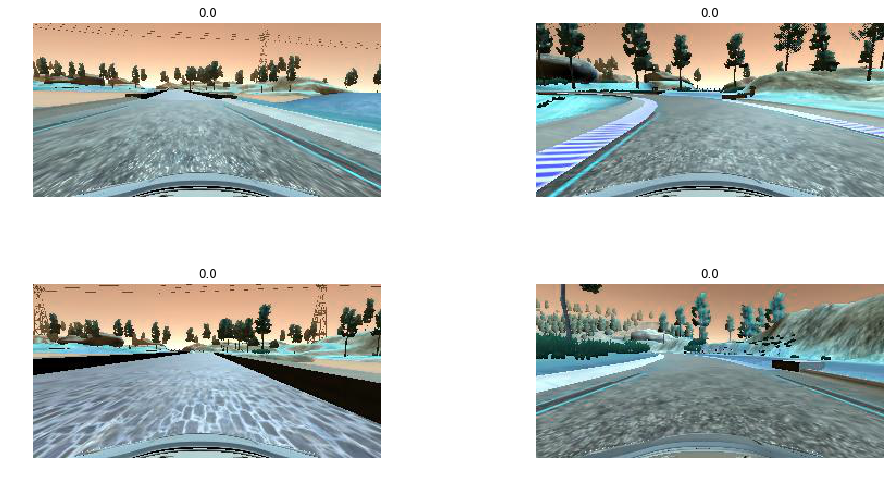

In [77]:
show_random_image(X_train, y_train, 2, 2, (18,8))

In [65]:
model = Sequential()

model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
model.add(Convolution2D(6, 5, 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(6, 5, 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train,y_train, validation_split=0.2, nb_epoch=5, shuffle=True, verbose=1)

Train on 1242 samples, validate on 311 samples
Epoch 1/5
1242/1242 [==============================] - 71s - loss: 3.3182 - val_loss: 0.3240
Epoch 2/5
1242/1242 [==============================] - 70s - loss: 0.0311 - val_loss: 0.3302
Epoch 3/5
1242/1242 [==============================] - 74s - loss: 0.0282 - val_loss: 0.3442
Epoch 4/5
1242/1242 [==============================] - 69s - loss: 0.0271 - val_loss: 0.3500
Epoch 5/5
1242/1242 [==============================] - 67s - loss: 0.0267 - val_loss: 0.3501


In [85]:
# Nvidia Network
from keras.layers import Dropout

model = Sequential()

model.add( Cropping2D( cropping=( (70,25), (0,0) ), input_shape=(160,320,3)))
#Normalize the data.
model.add( Lambda( lambda x: x/255. - 0.5 ) )

# Convolution Layers
model.add( Convolution2D( 24, 5, 5, subsample=(2,2), activation = 'relu' ) )
model.add( Convolution2D( 36, 5, 5, subsample=(2,2), activation = 'relu' ) )
model.add( Convolution2D( 48, 5, 5, subsample=(2,2), activation = 'relu' ) )
model.add( Convolution2D( 64, 3, 3, subsample=(1,1), activation = 'relu' ) )
model.add( Convolution2D( 64, 3, 3, subsample=(1,1), activation = 'relu' ) )
# Flatten for transition to fully connected layers.
model.add( Flatten() )
# Fully connected layers
model.add( Dense( 100 ) )
model.add(Dropout(0.5)) # I added this dropout layer myself, because the previous 
                        # fully connected layers has a lot of free parameters 
                        # and seems like the layer most in danger of overfitting. 
model.add( Dense( 50 ) )
model.add( Dense( 10 ) )
model.add( Dense( 1 ) )

model.compile(loss='mse', optimizer='adam')
model.fit(X_train,y_train, validation_split=0.2, nb_epoch=10, shuffle=True, verbose=1)

Train on 1816 samples, validate on 454 samples
Epoch 1/10
1816/1816 [==============================] - 35s - loss: 0.0752 - val_loss: 0.0191
Epoch 2/10
1816/1816 [==============================] - 37s - loss: 0.0692 - val_loss: 0.0455
Epoch 3/10
1816/1816 [==============================] - 32s - loss: 0.0614 - val_loss: 0.0256
Epoch 4/10
1816/1816 [==============================] - 31s - loss: 0.0609 - val_loss: 0.0206
Epoch 5/10
1816/1816 [==============================] - 31s - loss: 0.0431 - val_loss: 0.0362
Epoch 6/10
1816/1816 [==============================] - 31s - loss: 0.0326 - val_loss: 0.0181
Epoch 7/10
1816/1816 [==============================] - 31s - loss: 0.0318 - val_loss: 0.0186
Epoch 8/10
1816/1816 [==============================] - 30s - loss: 0.0269 - val_loss: 0.0257
Epoch 9/10
1816/1816 [==============================] - 32s - loss: 0.0252 - val_loss: 0.0260
Epoch 10/10
1816/1816 [==============================] - 32s - loss: 0.0253 - val_loss: 0.0219


In [86]:
model.save('model4withAnotherdata.h5')